In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import sys 
from scipy.io import wavfile
import scipy.io
import wave

afficher un audio de dataset utiliser on appelons la fonction wav.read()

la base de données avec lequel je travaille contient au total 60 audios (48 dédiés au train et 12 au test)
note:J'ai essayé un autre base de données qui contient des classes (son de chien, son de chat, vagues de la mer ...) avec lequel j'ai trouvé des diffécultés. et pour cela je trouve à travailler avec une base de données d'audios normaux.

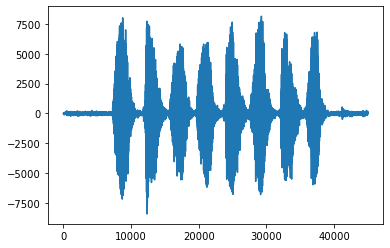

In [4]:
filename='train_data/'
filename1=filename+'1.wav'
fs, data = wavfile.read(filename1)
plt.plot(data)
plt.show()

la mat_audios affiche tous les audios pour la data train

In [ ]:
fm1, data = wavfile.read('train_data/1.wav')
mat_audios=np.zeros((48,len(data)))
for i in range (0,48):
    f='train_data/'+str(i+1)+'.wav'
    fs,data=wavfile.read(f)
    mat_audios[i,:]=data
mat_audios

# partie extraction des features

In [9]:
def e(data):
    n=len(data)
    for i in range(0,len(data)):
        E=1/n*abs(np.sum(data[i])**2)
    return E
#e(data)

In [10]:
def zcr(data):
    zc = np.sum(np.abs(np.diff(np.sign(data)))) / 2
    return zc
#print(zcr(data))

In [11]:
def entropie(data):
    n_short_blocks=10
    data_energy = np.sum(data ** 2)
    data_length = len(data)
    sub_win_len = int(np.floor(data_length / n_short_blocks))
    if data_length != sub_win_len * n_short_blocks:
        data = data[0:sub_win_len * n_short_blocks]
    sub_wins = data.reshape(sub_win_len, n_short_blocks, order='F').copy()
    s = np.sum(sub_wins ** 2, axis=0) / (data_energy)
    entropy = -np.sum(s * np.log2(s))
    return entropy
#print(entropie(data))

In [12]:
def energy(data, windowLength, stepLength):
    E_f=[]
    for i in range(0,len(data),stepLength):
        E_f.append((1/windowLength)*(abs(np.sum(data[i])**2)))
    Et=abs(np.sum(E_f))
    return E_f
#print(energy(data, 200, 200))

In [13]:
def Z(data, windowLength, stepLength):
    z=[];j=0
    for i in range(0, len(data),stepLength):
        j=j+stepLength
        z.append(np.sum(abs(np.diff(np.sign(data[i:j])))) / 2)
    return z
#zcr(data,250,250)

In [14]:
def energy_entropy(data,windowLength, stepLength):
    j=0;sh_win=[]
    for i in range(0,len(data), stepLength):
        j=j+stepLength
        sh_win=(data[i:j])
    for i in range(0, len(sh_win),int(stepLength/2)):
        j=j+int(stepLength/2)
        sub_win=sh_win[i:j]
    Esub=energy(sub_win, windowLength, stepLength)
    Esh=np.sum(Esub)
    s=[]
    s.append(np.sum(Esh)/np.sum(Esub))
    entropy=[]
    for i in range(0,len(s)):
        entropy.append(-np.sum(s[i] * np.log2(s[i])))
    return entropy
#print(energy_entropy(data,250, 250))

la matrice descipteur retourn le résultat de (energie, zcr, la moyenne et la variance)

In [15]:
desc_mat=[]
desc_mat=np.zeros((48,4))
for i in range(0,48):
    filename1= filename+ str(i+1) + '.wav'
    fs, data=wavfile.read(filename1)
    desc_mat[i][0]=e(data)
    desc_mat[i][1]=zcr(data)
    desc_mat[i][2]=np.mean(data[i])
    desc_mat[i][3]=np.var(data[i])
desc_mat  

array([[ 2.69128114e-03,  4.82800000e+03,  1.00000000e+00,
         0.00000000e+00],
       [ 3.66666667e-02,  5.18700000e+03,  2.00000000e+00,
         0.00000000e+00],
       [ 3.98622047e-02,  5.33500000e+03,  1.00000000e+00,
         0.00000000e+00],
       [ 5.19415680e-02,  5.64300000e+03,  1.00000000e+00,
         0.00000000e+00],
       [ 1.96603928e-02,  5.36600000e+03,  1.00000000e+00,
         0.00000000e+00],
       [ 9.96705107e-03,  5.34000000e+03,  2.00000000e+00,
         0.00000000e+00],
       [ 1.62790698e-02,  5.32500000e+03,  2.00000000e+00,
         0.00000000e+00],
       [ 4.82857143e-01,  5.23600000e+03,  1.00000000e+00,
         0.00000000e+00],
       [ 3.71583601e-02,  4.83500000e+03,  1.66200000e+03,
         0.00000000e+00],
       [ 4.16050296e-03,  5.19500000e+03,  1.00000000e+00,
         0.00000000e+00],
       [ 2.89262821e-02,  5.22400000e+03, -1.00000000e+00,
         0.00000000e+00],
       [ 4.76007719e-01,  5.94700000e+03,  2.00000000e+00,
      

# partie de cassification 

fonction stocker_train retourn mat_tr qui contient  features (energie, zcr, entropy) pour chaque audio de notre data train

In [17]:
def stocker_train(filename):
    mat_tr=np.zeros((48,3))
    for i in range(0,48):
        filename1= filename+ str(i+1) + '.wav'
        fs, data=wavfile.read(filename1)
        mat_tr[i,0]= e(data)
        mat_tr[i,1]= zcr(data)
        mat_tr[i,2]= entropie(data)
    return mat_tr
#print(stocker_train(filename))

fonction stocker_test retourn mat_tst qui contient les features (energie, zcr, entropy) pour chaque audio de notre data test

In [36]:
filename_tst='test_data/'

In [37]:
def stocker_test(filename_tst):
    filename1=filename_tst+'1.wav'
    fs, data=wavfile.read(filename1)
    mat_tst=np.zeros((12,3))
    for i in range(0,12):
        filename2= filename_tst+ str(i+1) + '.wav'
        fs, data=wavfile.read(filename2)
        mat_tst[i,0]= e(data)
        mat_tst[i,1]= zcr(data)
        mat_tst[i,2]= entropie(data)
    return mat_tst
#print(stocker_test(filename_tst))

In [38]:
matrice_train=stocker_train(filename)
matrice_test=stocker_test(filename_tst)

fonction stock_dist return dist_mat entre matrice_train et matrice_test 

In [13]:
def stocke_dist(mat_train,mat_test):
    distance_mat=np.zeros((48,12))
    for i in range(0,48):
        for j in range(0,12):
            distance_mat[i,j] = np.sqrt(np.sum(matrice_train[i]-matrice_test[j])**2)
    return distance_mat
matrice_distance=stocke_dist(matrice_train, matrice_test)
#print(matrice_distance)

trier la matrice 

In [14]:
mat_index=np.argsort(matrice_distance,axis=1)
mat_index

array([[ 9, 10,  0,  2,  4,  5,  8,  7, 11,  6,  3,  1],
       [ 5,  2,  7, 11,  6,  3, 10,  9,  0,  4,  8,  1],
       [ 6, 11,  7,  3,  5,  2, 10,  9,  0,  4,  8,  1],
       [ 3,  6, 11,  7,  5,  2, 10,  9,  0,  4,  8,  1],
       [ 3,  6, 11,  7,  5,  2, 10,  9,  0,  4,  8,  1],
       [ 6, 11,  7,  3,  5,  2, 10,  9,  0,  4,  8,  1],
       [ 6, 11,  7,  3,  5,  2, 10,  9,  0,  4,  8,  1],
       [ 7, 11,  6,  5,  2,  3, 10,  9,  0,  4,  8,  1],
       [ 9, 10,  0,  2,  4,  5,  8,  7, 11,  6,  3,  1],
       [ 5,  2,  7, 11,  6,  3, 10,  9,  0,  4,  8,  1],
       [ 5,  7, 11,  6,  2,  3, 10,  9,  0,  4,  8,  1],
       [ 3,  6, 11,  7,  5,  2, 10,  9,  0,  4,  8,  1],
       [10,  9,  2,  0,  5,  7, 11,  6,  4,  8,  3,  1],
       [ 3,  6, 11,  7,  5,  2, 10,  9,  0,  4,  8,  1],
       [ 5,  2,  7, 11,  6, 10,  3,  9,  0,  4,  8,  1],
       [10,  2,  5,  9,  7, 11,  6,  0,  3,  4,  8,  1],
       [ 3,  6, 11,  7,  5,  2, 10,  9,  0,  4,  8,  1],
       [10,  2,  5,  9,  7, 11,

fonction stocke_pert retourn mat_pert qui remplasse les indices des images pertinentes par 1 et 0 sinon

In [15]:
def stocke_pert(matrice):
    mat_pert=np.zeros((48,12))
    nbr_classe=6
    k=0
    for i in range(nbr_classe):
        z1=k
        z2=(i+1)*5
        classe=matrice[z1:z2,:]
        a=classe>=z1
        b=classe<z2
        mat_pert[z1:z2,:]=a*b
        k=k+nbr_classe
    return mat_pert

In [16]:
matrice_pert=(stocke_pert(mat_index))
print(matrice_pert)

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.

In [17]:
prec=np.zeros((1,len(matrice_pert)))
rec=np.zeros((1,len(matrice_pert)))
pertinent=np.sum(data)

appliquons prec et rec sur la matrice_pert

In [18]:
for i in range(1,len(matrice_pert)):
    VP=np.sum(matrice_pert[0:i])
    FP=i-VP
    FN=pertinent-VP
    VN=len(matrice_pert)-1-i-FN
    prec[0,i-1]=VP/(VP+FP)
    rec[0,i-1] =VP/(VP+FN)
print(prec,'\n')
print(rec,'\n')
for i in range(0,len(matrice_pert)):
    for j in range(0,len(matrice_pert[0,:])):
        if (matrice_pert[i,j]==1):
            pr=np.append(prec,prec[0,i])
            re=np.append(rec,rec[0,i])
#pr=prec[matrice_pert==1]
#re=rec[0,matrice_pert==1]
print(pr,'\n')
print(re,'\n')

[[5.         5.         5.         5.         5.         4.16666667
  4.14285714 4.125      4.11111111 4.1        3.72727273 3.41666667
  3.15384615 2.92857143 2.73333333 2.5625     2.41176471 2.27777778
  2.15789474 2.05       1.95238095 1.86363636 1.7826087  1.70833333
  1.64       1.57692308 1.51851852 1.46428571 1.4137931  1.36666667
  1.32258065 1.28125    1.24242424 1.20588235 1.17142857 1.13888889
  1.10810811 1.07894737 1.05128205 1.025      1.         0.97619048
  0.95348837 0.93181818 0.91111111 0.89130435 0.87234043 0.        ]] 

[[0.00023715 0.00047429 0.00071144 0.00094859 0.00118573 0.00118573
  0.00137545 0.00156517 0.00175489 0.0019446  0.0019446  0.0019446
  0.0019446  0.0019446  0.0019446  0.0019446  0.0019446  0.0019446
  0.0019446  0.0019446  0.0019446  0.0019446  0.0019446  0.0019446
  0.0019446  0.0019446  0.0019446  0.0019446  0.0019446  0.0019446
  0.0019446  0.0019446  0.0019446  0.0019446  0.0019446  0.0019446
  0.0019446  0.0019446  0.0019446  0.0019446  0.0

calculons la moyenne 

In [19]:
pr_moy=np.sum(pr)/pr.shape
print(pr_moy)

[2.277846]
